# LAB 06 - 데이터 간의 관계 시각화 (1)

- 데이터 관계 시각화 그래프 4종


## 01 Scatter Plot 산점도 그래프

## 데이터 관계 시각화 그래프 4종

| 그래프 종류 | 주요 목적                 | 회귀선 | 그룹 비교 | 사용 상황                     |
|-------------|---------------------------|--------|-----------|-------------------------------|
| ScatterPlot | 기본 관계 파악            | X      | X         | 기초 탐색                     |
| RegPlot     | 선형 경향 + 신뢰구간 확인 | O      | X         | 관계 해석 강화               |
| LmPlot      | 그룹별 선형관계 비교      | O      | O         | 비교 분석(성별/지역 등)      |
| PairPlot    | 전체 변수 관계 한눈에 보기 | X      | 제한적(hue 지원) | EDA 초기 전체 스캔        |



### Scatter Plot 의 이해
- 두 개의 연속형 변수의 관계를 시각화 하는 가장 기본적인 그래프
- 두 연속형 변수 간의 영향력을 점으로 표시함
- 직선 혹은 곡선 패턴, 군집 현태 , 이상치를 쉽게 파악
- 통계약 모델을 포함하는 것은 아니며, 관계의 형태를 그려준다
- 변수간의 기본적인 관계가 있는지 빠르게 확인할 때 사용한다


### Scatter Plot 의 해석
- 마커들이 오밀조밀 뭉쳐있으면 두 변수는 서로 관련성이 높고, 흩어져 있으면 관련성이 낮다

### #01.준비작업

#### 1-1 패키지 참조

In [3]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np


#### 1-2 그래프 초기화

In [4]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 200 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [5]:
origin = load_data('icecream')
origin

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


### #02.Scatter Plot 시각화
- hue 파라미터로 데이터 범주 구별이 가능함
- (알수있는 사실) : 기온에 따른 아이스크림 판매량을 산점도 그래프로 확인한 결과, 기온이 상승할 수록 아이스크림 판매량도 증가하는 추세를 보이는 것으로 확인되었다

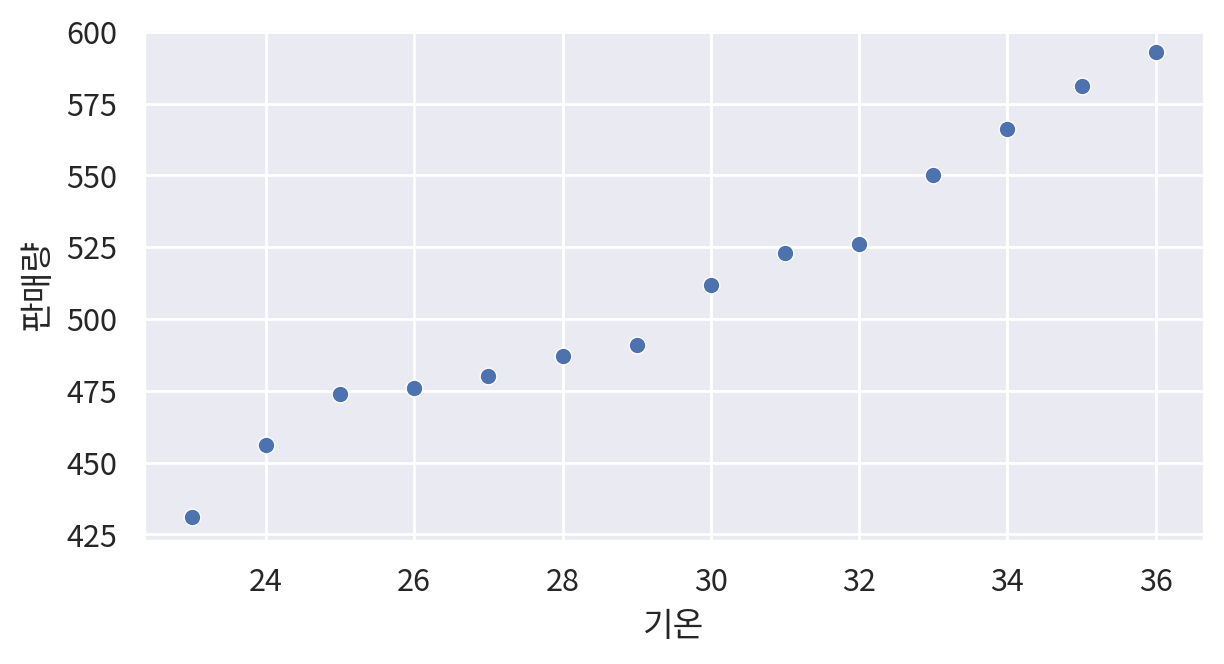

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.scatterplot(
    data=origin, x='기온', y='판매량',
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #03.추세선 (회귀선 그리기)
- 주어진 데이터의 일반적인 경향이나 패턴을 나타내는 선
- 추세선은 주로 선형 회귀 분석을 통해 계산되며 이를 통해 데이터 간의 관계를 파악하고 예측 모델을 개발하는 데 도움이 된다
- 일반적으로 추세선을 그리기 위해서는 scipy 나 sklearn 패키지를 통해 선형회귀 모델을 구현하여 회귀식을 도출해야 하지만 간단한 선형 회귀의 경우 numpy 를 통해서도 분석 모델을 도출할 수 있다


#### 3-1 기울기 (계수, 가중치) 와 절편 (상수항, 편향) 구하기
- 통계학에서는 ax+b 를 각각 가중치 (기울기) , 편향 (절편) 이라고 하지만, numpy 는 수학적 기능을 구현하고 있는 패키지 이므로 numpy 에서는 상수항과 계수 라고 표현함
- 계수, 상수항 = np.polyfit(x,y,차수)


In [8]:
z=np.polyfit(origin['기온'],origin['판매량'],1)
print('상수항:' , z[0])
print('계수:' , z[1])

상수항: 11.397802197802186
계수: 174.19340659340722


#### 3-2 회귀 분석 모형
- 상수항과 계수를 활용하여 y=ax+b 에 해당하는 방정식을 확인한다

In [9]:
expr = 'y=%0.1f * x + %0.1f'%(z[0],z[1])
expr

'y=11.4 * x + 174.2'

#### 3-3 분석 모형 객체 생성
- y = ax+b 에 해당하는 방정식 객체를 생성한다

In [10]:
f = np.poly1d(z)   #위에서 정의한 상수항과 계수를 1차원 객체로 만들기, 이제 이 f 에 x 값을 넣으면 y 값이 출력된다
f

poly1d([ 11.3978022 , 174.19340659])

#### 3-4 분석 모형을 활용한 판매량 예
- 방정식 f(x) 에 x 값을 전달하면 그에 대한 결과를 확인할 수 있다

In [11]:
x=40
print('기온이 %d 일 경우, 아이스크림 판매량은 %f 로 예상됩니다' %(x,f(x)))

기온이 40 일 경우, 아이스크림 판매량은 630.105495 로 예상됩니다


#### 3-5 전체 기온에 대한 예측 판매량 확인

In [ ]:
#회귀선에 대한 값들이 y 
x= origin['기온']
y=f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

- 추세선을 포함하는 산점도 그래프

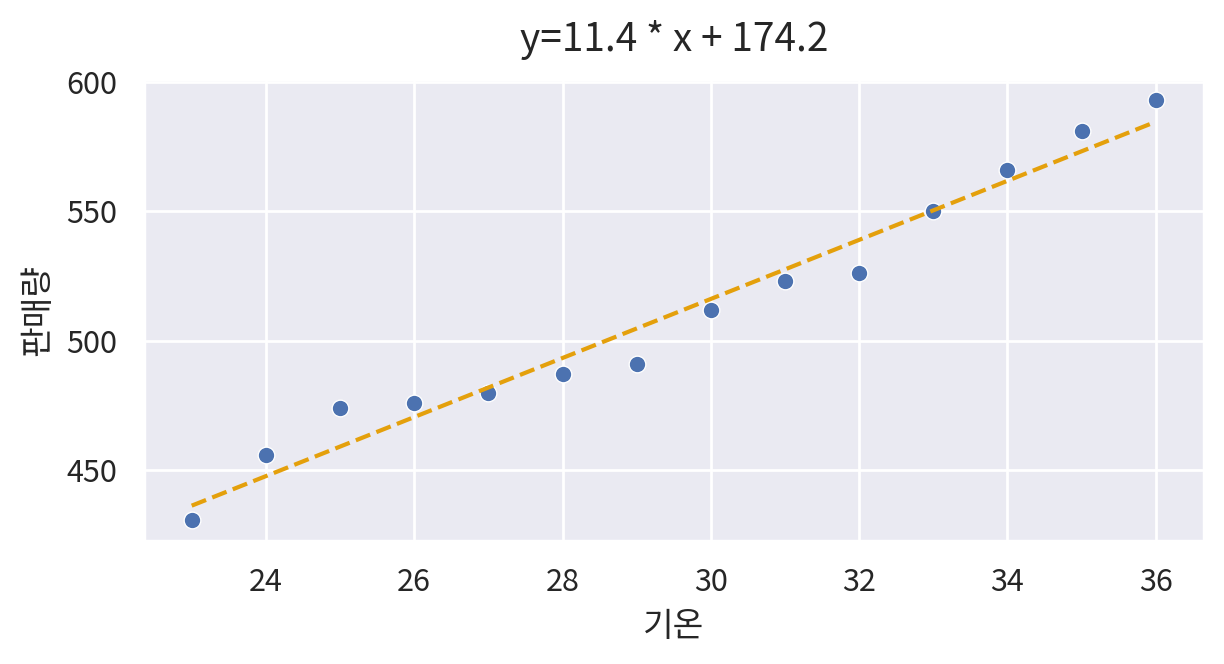

In [15]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2-1 ) Scatter Plot 그리기
sb.scatterplot(
    data=origin, x='기온', y='판매량',
)


# 2-2 ) Line Plot 그리기
sb.lineplot(
     x=x, y=y,color ='#e4a00c',linestyle ='--'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
ax.set_title(expr,fontsize=14,pad=10)


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료
